# Initialization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import random
import math
from collections import Counter

## Data

In [2]:
num_friends = [random.randint(0, 101) for _ in range(200)]
daily_minutes = [random.randint(0, 101) for _ in range(200)]

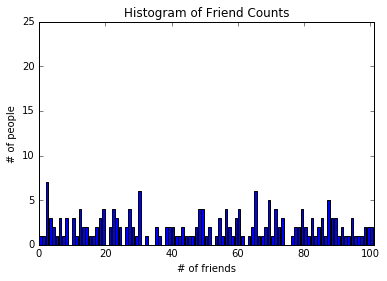

In [3]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

## Statistics

In [4]:
def mean(x):
    return sum(x) / len(x)

def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [5]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

# dispersion
def data_range(x):
    return max(x) - min(x)

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

In [6]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def sum_of_squares(x):
    return sum([x_i**2 for x_i in x])

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

In [7]:
def dot(x, y):
    return sum([x_i * y_i for x_i, y_i in zip(x, y)])

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

### Examples

In [8]:
mean(num_friends)

49.655

In [9]:
median(num_friends)

51.0

In [10]:
mode(num_friends)

[2]

In [11]:
quantile(num_friends, 0.5)

51

In [12]:
data_range(num_friends)

101

In [13]:
interquartile_range(num_friends)

55

In [14]:
variance(num_friends)

898.3376633165828

In [15]:
standard_deviation(num_friends)

29.972281583432764

In [16]:
covariance(num_friends, daily_minutes)

66.05841708542714

In [17]:
correlation(num_friends, daily_minutes)

0.07716059053409388

# Further Exploration (pandas)

In [18]:
import pandas as pd

In [19]:
num_friends_ser = pd.Series(num_friends)
daily_minutes_ser = pd.Series(daily_minutes)

In [20]:
num_friends_ser.describe()

count    200.000000
mean      49.655000
std       29.972282
min        0.000000
25%       22.000000
50%       51.000000
75%       76.250000
max      101.000000
dtype: float64

In [21]:
num_friends_ser.mean()

49.655

In [22]:
num_friends_ser.corr(daily_minutes_ser)

0.077160590534093881

In [23]:
num_friends_ser.cov(daily_minutes_ser)

66.058417085427152